In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

Leitura dos dados diretamente do scikit-learn

In [2]:
dados = load_breast_cancer()
X = dados.data
Y = dados.target

In [3]:
print(dados.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Train-test split

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y,
                                            test_size = 0.2,
                                            random_state=42,
                                            stratify=Y)

print(x_tr.shape)
print(x_te.shape)

(455, 30)
(114, 30)


In [6]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)

DecisionTreeClassifier()

In [7]:
y_pred = dtc.predict(x_te)
accuracy_score(y_te, y_pred)

0.9035087719298246

In [8]:
tr_acc = []
tr_std = []

for this_md in range(2,30):
    dtc = DecisionTreeClassifier(max_depth=this_md)
    dtc.fit(x_tr, y_tr)
    scores = cross_val_score(dtc, x_tr, y_tr, cv=10)
    tr_acc.append(scores.mean())
    tr_std.append(np.std(scores))

<ErrorbarContainer object of 3 artists>

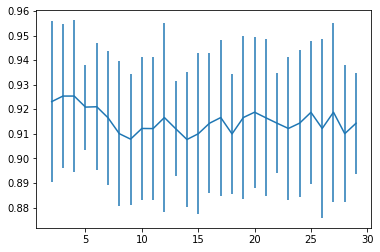

In [9]:
import matplotlib.pyplot as plt
plt.errorbar(x=range(2,30), y=tr_acc, yerr=tr_std)

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': range(2,30,2),
              'min_samples_leaf': range(2,10,2),
              'min_impurity_decrease': np.linspace(0,0.5,10)}
dtc = DecisionTreeClassifier()
gs = GridSearchCV(dtc, param_grid=param_grid)
gs.fit(x_tr, y_tr)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 30, 2),
                         'min_impurity_decrease': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ]),
                         'min_samples_leaf': range(2, 10, 2)})

In [11]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=22, min_samples_leaf=2)

In [14]:
dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

dtc.fit(x_tr, y_tr)
y_pred = dtc.predict(x_te)
accuracy_score(y_te, y_pred)

0.9298245614035088